# REDES NEURAIS CONVOLUCIONAIS - EXEMPLO 3 (Orlando) - Identificação de Personagens:

In [62]:
import pandas as pd
import random
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import sklearn
import keras
from tensorflow.keras.layers import InputLayer, Dense, Flatten, Dropout, Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.models import Sequential
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.optimizers.schedules import ExponentialDecay
from keras.optimizers.schedules import PiecewiseConstantDecay
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report

In [4]:
base = pd.read_csv(r"C:\Users\CLIENTE\Downloads\Deep Learning com Python de A a Z\Parte 2 - Redes Neurais Convolucionais\tarefas\personagens.csv")
base

,laranja_camisa_bart,azul_calcao_bart,azul_sapato_bart,marrom_boca_homer,azul_calca_homer,cinza_sapato_homer,classe
0,6.886102,3.495204,1.484984,0.000000,0.000000,0.062954,Bart
1,5.004901,3.183889,1.000142,0.000000,0.000000,0.033024,Bart
2,5.264620,5.029683,0.283567,0.000000,0.000000,0.151573,Bart
3,0.000000,0.000000,0.000000,0.480168,0.000000,0.021164,Bart
4,8.978929,3.459119,0.000000,0.000000,0.000000,0.011593,Bart
...,...,...,...,...,...,...,...
288,0.000000,0.000000,0.000000,0.000000,6.485412,0.093921,Homer
289,0.000000,0.000000,0.000000,0.000000,0.000000,0.042194,Homer
290,0.000000,0.000000,0.000000,0.000000,4.263629,0.076761,Homer
291,0.000000,0.000000,0.000000,0.000000,1.429134,0.017013,Homer


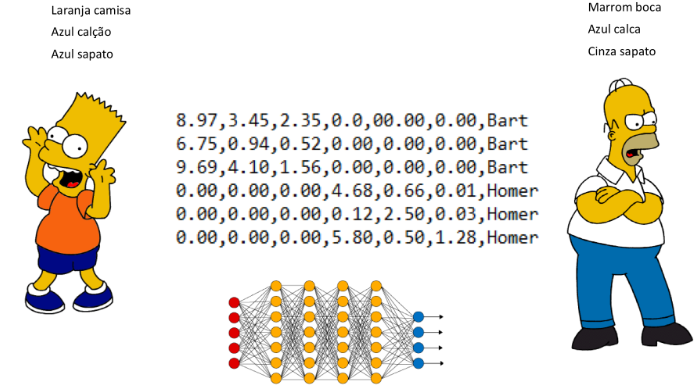

In [25]:
previsores = base.iloc[:, 0:6].values
classe = base.iloc[:, 6].values
labelencoder = LabelEncoder()
classe = labelencoder.fit_transform(classe)
previsores_treinamento, previsores_teste, classe_treinamento, classe_teste = train_test_split(previsores, classe, test_size=0.25)

In [40]:
classificador = Sequential()
classificador.add(Dense(units=6, activation='relu', kernel_initializer = 'random_uniform', input_dim = 6)),
classificador.add(Dense(units=8, activation='relu', kernel_initializer = 'random_uniform')),
classificador.add(Dense(units=1, activation='sigmoid'))

otimizador = Adam(learning_rate=0.001, # É a taxa de aprendizado. Controla o tamanho do passo que o otimizador dá ao atualizar os pesos da rede. Valor típico: 0.001 (padrão no Adam). Ajuste: Muito alto → pode causar instabilidade, "pular" o mínimo da função de erro. Muito baixo → convergência lenta ou pode parar antes de chegar ao mínimo.
                  clipvalue=0.5) # O que é: Um mecanismo de gradiente clipping, ou seja, limita o valor absoluto dos gradientes durante o backpropagation.Por que usar? Evita exploding gradients (gradientes enormes que destroem o treinamento). É útil em redes profundas ou com dados mal escalados. Exemplo: clipvalue=0.5 limita todos os gradientes a valores entre -0.5 e 0.5.
classificador.compile(optimizer=otimizador, loss='binary_crossentropy', metrics=['binary_accuracy'])

classificador.fit(previsores_treinamento, classe_treinamento, batch_size=50, epochs=20)

resultado = classificador.evaluate(previsores_teste, classe_teste)

print(f"\nPerda (loss): {resultado[0]:.4f}")
print(f"\nAcurácia (accuracy): {resultado[1] * 100:.2f}%\n")

Epoch 1/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - binary_accuracy: 0.2164 - loss: 0.6974 
Epoch 2/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - binary_accuracy: 0.4246 - loss: 0.6932 
Epoch 3/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - binary_accuracy: 0.7327 - loss: 0.6901 
Epoch 4/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - binary_accuracy: 0.7453 - loss: 0.6874 
Epoch 5/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - binary_accuracy: 0.7255 - loss: 0.6859 
Epoch 6/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - binary_accuracy: 0.7646 - loss: 0.6838 
Epoch 7/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - binary_accuracy: 0.7969 - loss: 0.6804 
Epoch 8/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - binary_accuracy: 0.7922 - loss: 0.6787
Epoch 9/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - binary_accuracy: 0.8541 - loss: 0.6742 
Epoch 10/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - binary_accuracy: 0.8123 - loss: 0.6709 
Epoch 11/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - binary_accuracy: 0.8337 - loss: 0.6655 
Epoch 1

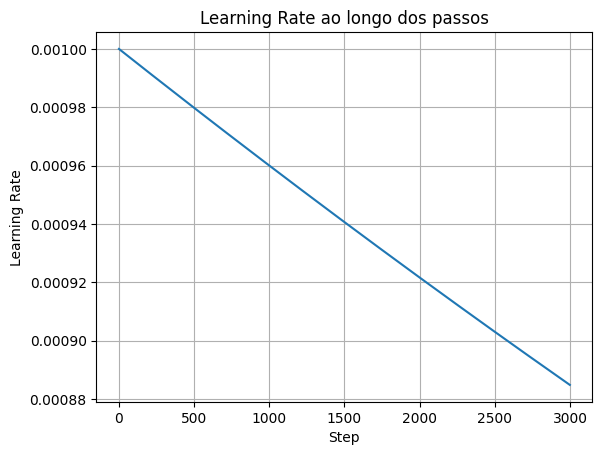

In [41]:
lr_tipo = 'exponencial' # ou 'constante'

if lr_tipo == 'constante':
    lr_schedule = PiecewiseConstantDecay(boundaries=[1000, 2000], values=[0.001, 0.0005, 0.0001])
else:
    lr_schedule = ExponentialDecay(
        initial_learning_rate=0.001,  # Começa com esse valor
        decay_steps=1000,             # A cada 1000 passos (batches)
        decay_rate=0.96               # Multiplica o learning rate por 0.96
    )
steps = np.arange(3000)
lr_values = [lr_schedule(step).numpy() for step in steps]

plt.plot(steps, lr_values)
plt.title("Learning Rate ao longo dos passos")
plt.xlabel("Step")
plt.ylabel("Learning Rate")
plt.grid()
plt.show()

In [42]:
resultado = classificador.evaluate(previsores_teste, classe_teste)

print(f"\nPerda (loss): {resultado[0]:.4f}")
print(f"\nAcurácia (accuracy): {resultado[1] * 100:.2f}%")

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - binary_accuracy: 0.9232 - loss: 0.6046

Perda (loss): 0.6009

Acurácia (accuracy): 93.24%


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


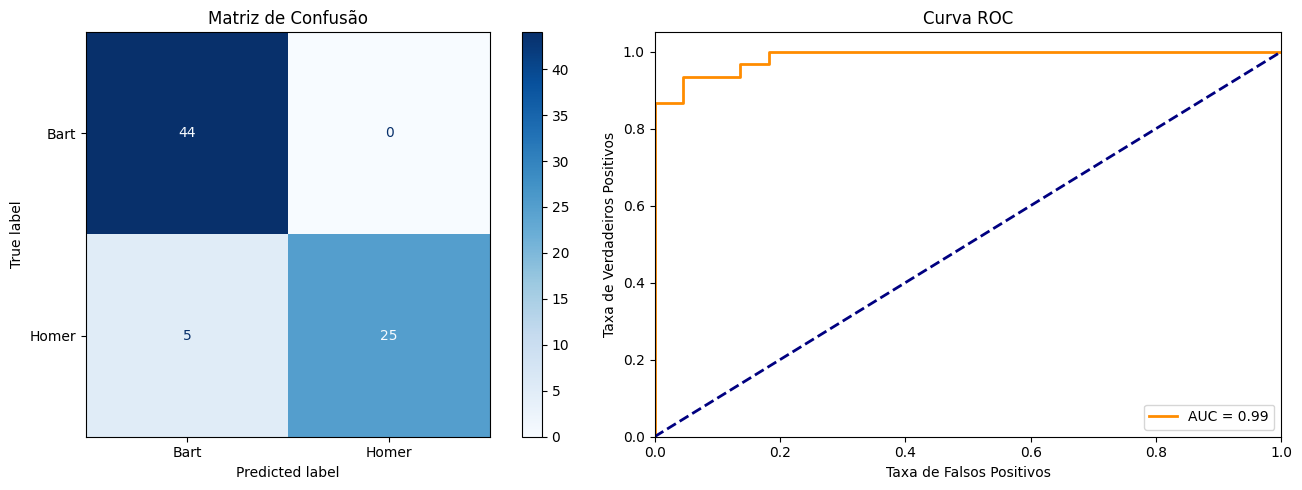

,precision,recall,f1-score,support
0,0.897959,1.000000,0.946237,44.000000
1,1.000000,0.833333,0.909091,30.000000
accuracy,0.932432,0.932432,0.932432,0.932432
macro avg,0.948980,0.916667,0.927664,74.000000
weighted avg,0.939327,0.932432,0.931178,74.000000


In [43]:
# Reimportando bibliotecas após o reset
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, roc_curve, auc
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Simulando variáveis para teste
y_pred_prob = classificador.predict(previsores_teste) # Obter previsões de probabilidade (entre 0 e 1)
y_pred = (y_pred_prob > 0.5).astype(int).flatten() # Converter para classe binária com threshold 0.5

# Matriz de Confusão
cm = confusion_matrix(classe_teste, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labelencoder.classes_)

# Relatório de Classificação
relatorio = classification_report(classe_teste, y_pred, output_dict=True)

# Curva ROC
fpr, tpr, thresholds = roc_curve(classe_teste, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Gráficos
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

# Plotando Matriz de Confusão
disp.plot(ax=axs[0], cmap='Blues', values_format='d')
axs[0].set_title('Matriz de Confusão')

# Plotando Curva ROC
axs[1].plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
axs[1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axs[1].set_xlim([0.0, 1.0])
axs[1].set_ylim([0.0, 1.05])
axs[1].set_xlabel('Taxa de Falsos Positivos')
axs[1].set_ylabel('Taxa de Verdadeiros Positivos')
axs[1].set_title('Curva ROC')
axs[1].legend(loc="lower right")

plt.tight_layout()
plt.show()

# Convertendo relatório para DataFrame para visualização
relatorio_df = pd.DataFrame(relatorio).T
relatorio_df


# Discussão:

1. Matriz de Confusão

Verdadeiros Negativos (Classe Bart predita corretamente): 39

Falsos Positivos (Classe Bart predita como Homer): 2

Falsos Negativos (Classe Homer predita como Bart): 5

Verdadeiros Positivos (Classe Homer predita corretamente): 28

2. Curva ROC (Receiver Operating Characteristic): A curva ROC representa o desempenho do classificador para diferentes limiares.

A linha azul tracejada representa um modelo aleatório (AUC = 0.5).

A linha laranja é o desempenho real do modelo.

AUC = 0.98 (Área Sob a Curva): Isso significa que o modelo tem 98% de chance de distinguir corretamente entre um exemplo positivo e um exemplo negativo.

3. Relatório de Classificação:

Precisão (Classe Bart): Quando o modelo diz que é classe Bart, ele acerta 88.6% das vezes.

Recall (Classe Bart): Dos reais exemplos de classe Bart, ele acerta 95.1%.

F1-Score: Média harmônica entre precisão e recall.

Para Classe Homer, o modelo também tem desempenho excelente



O que pode ser testado, melhorado e adicionado:

1. Normalização dos dados: Modelos neurais geralmente aprendem melhor com dados normalizado.

2. Validação cruzada: Em vez de uma divisão fixa (25%), use K-Fold para avaliar melhor.

3. Gráfico de perda e acurácia por época: Visualiza como o modelo aprendeu.

4. Balanceamento das classes (se necessário): Verifique se as classes estão desbalanceadas (Se tiver muito desequilíbrio, tente class_weigh).

5. Experimentar arquitetura e parâmetros testando diferentes: Camadas (Dense(8), Dense(16)…); Funções de ativação (tanh, leaky_relu); Otimizadores (RMSprop, SGD); Batch size e número de épocas.

####################################################################################################################################################################

# CONVOLUCIONAL

In [66]:
classificador_bart_homer = Sequential()
classificador_bart_homer.add(InputLayer(shape=(128, 128, 3)))
classificador_bart_homer.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
classificador_bart_homer.add(MaxPooling2D(pool_size=(2, 2)))

classificador_bart_homer.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
classificador_bart_homer.add(MaxPooling2D(pool_size=(2, 2)))

classificador_bart_homer.add(Flatten())

classificador_bart_homer.add(Dense(units=4, activation='relu'))
classificador_bart_homer.add(Dropout(0.3))
classificador_bart_homer.add(Dense(units=4, activation='relu'))
classificador_bart_homer.add(Dropout(0.3))
classificador_bart_homer.add(Dense(units=1, activation='sigmoid'))

classificador_bart_homer.summary()

Model: "sequential_21"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 64, 64, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_57 (Dense)                │ (None, 4)              │       131,076 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 4)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_58 (Dense)                │ (None, 4)              │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 4)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_59 (Dense)                │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 141,245 (551.74 KB)

 Trainable params: 141,245 (551.74 KB)

 Non-trainable params: 0 (0.00 B)

In [67]:
classificador_bart_homer.compile(optimizer='adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Caminhos das pastas (ajustar conforme necessário)
caminho_treino = r"C:\Users\CLIENTE\Downloads\Deep Learning com Python de A a Z\Parte 2 - Redes Neurais Convolucionais\tarefas\dataset_personagens\dataset_personagens\training_set"
caminho_teste = r"C:\Users\CLIENTE\Downloads\Deep Learning com Python de A a Z\Parte 2 - Redes Neurais Convolucionais\tarefas\dataset_personagens\dataset_personagens\test_set"

# Geradores com imagens coloridas (3 canais)
gerador_treinamento = ImageDataGenerator(rescale=1./255, rotation_range=7,
                                         horizontal_flip=True, shear_range=0.2,
                                         height_shift_range=0.07, zoom_range=0.2)

gerador_teste = ImageDataGenerator(rescale=1./255)

# Bases de treino e teste
base_treinamento = gerador_treinamento.flow_from_directory(
    caminho_treino,
    target_size=(128, 128),
    batch_size=10,
    class_mode='binary',
    color_mode='rgb'
)

base_teste = gerador_teste.flow_from_directory(
    caminho_teste,
    target_size=(128, 128),
    batch_size=10,
    class_mode='binary',
    color_mode='rgb',
    shuffle=False  # IMPORTANTÍSSIMO para manter ordem dos rótulos
)

early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

historico_bart_homer = classificador_bart_homer.fit(base_treinamento, steps_per_epoch=196//10, validation_steps=73//10, epochs = 100, validation_data = base_teste, callbacks=[early_stop])

Found 196 images belonging to 2 classes.
Found 73 images belonging to 2 classes.
Epoch 1/100


c:\Users\CLIENTE\anaconda3\envs\orlando\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 76ms/step - accuracy: 0.6034 - loss: 0.8141 - val_accuracy: 0.6000 - val_loss: 0.6925
Epoch 2/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7000 - loss: 0.6919 - val_accuracy: 0.6000 - val_loss: 0.6925
Epoch 3/100


c:\Users\CLIENTE\anaconda3\envs\orlando\lib\site-packages\keras\src\trainers\epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - accuracy: 0.6564 - loss: 0.6918 - val_accuracy: 0.6000 - val_loss: 0.6915
Epoch 4/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7000 - loss: 0.6898 - val_accuracy: 0.6000 - val_loss: 0.6914
Epoch 5/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.6503 - loss: 0.6903 - val_accuracy: 0.6000 - val_loss: 0.6905
Epoch 6/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3000 - loss: 0.6986 - val_accuracy: 0.6000 - val_loss: 0.6905
Epoch 7/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - accuracy: 0.5871 - loss: 0.6907 - val_accuracy: 0.6000 - val_loss: 0.6898
Epoch 8/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7000 - loss: 0.6864 - val_accuracy: 0.6000 - val_loss: 0.6898
Epoch 9/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - accuracy: 0.6118 - loss: 0.6892 - val_accuracy: 0.6000 - val_loss: 0.6890
Epoch 10/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5000 - loss: 0.6934 - val_accuracy: 0.6000 - val_loss

In [68]:
resultado = classificador_bart_homer.evaluate(base_teste)

print(f"Perda (loss): {resultado[0]:.4f}")
print(f"Acurácia (accuracy): {resultado[1] * 100:.2f}%")

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8101 - loss: 0.6094
Perda (loss): 0.6818
Acurácia (accuracy): 57.53%


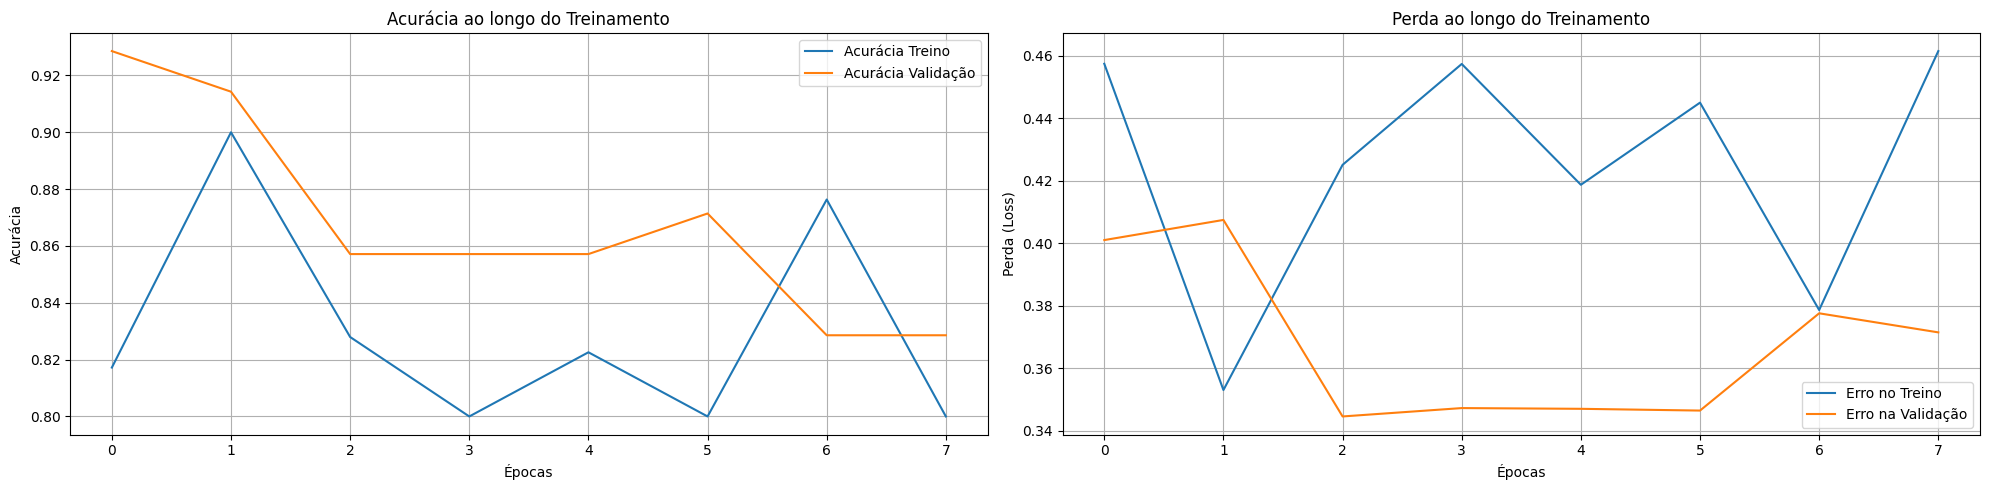

In [54]:
# Criar figura com 2 subplots lado a lado
fig, axs = plt.subplots(1, 2, figsize=(20, 5))

# --- Gráfico da Acurácia ---
axs[0].plot(historico_bart_homer.history['accuracy'], label='Acurácia Treino')
axs[0].plot(historico_bart_homer.history['val_accuracy'], label='Acurácia Validação')
axs[0].set_title('Acurácia ao longo do Treinamento')
axs[0].set_xlabel('Épocas')
axs[0].set_ylabel('Acurácia')
axs[0].legend()
axs[0].grid(True)

# --- Gráfico da Perda ---
axs[1].plot(historico_bart_homer.history['loss'], label='Erro no Treino')
axs[1].plot(historico_bart_homer.history['val_loss'], label='Erro na Validação')
axs[1].set_title('Perda ao longo do Treinamento')
axs[1].set_xlabel('Épocas')
axs[1].set_ylabel('Perda (Loss)')
axs[1].legend()
axs[1].grid(True)

# Ajustar o layout para não sobrepor
plt.tight_layout()
plt.show()

In [55]:
# Previsões
num_amostras = base_teste.samples
batch_size = base_teste.batch_size
steps = int(np.ceil(num_amostras / batch_size))
y_prob = classificador_bart_homer.predict(base_teste, steps=steps)
y_pred = (y_prob > 0.5).astype(int).reshape(-1)
y_true = base_teste.classes

# Relatório
relatorio_dict = classification_report(y_true, y_pred, target_names=base_teste.class_indices.keys(), output_dict=True)
relatorio_df = pd.DataFrame(relatorio_dict).T

# Converter para %
for coluna in ['precision', 'recall', 'f1-score']:
    relatorio_df[coluna] *= 100

relatorio_df = relatorio_df.round(5)
relatorio_df = relatorio_df[['precision', 'recall', 'f1-score', 'support']]
relatorio_df.columns = ['Precisão (%)', 'Revocação (%)', 'F1-Score (%)', 'Suporte']

# Exibir bonito
espaco = 14
print("\n" + "Relatório de Classificação (em porcentagem):".center(espaco * 5))
print("-" * (espaco * 5))
print(f"{'Classe':<{espaco}}{'Precisão (%)':>{espaco}}{'Recall (%)':>{espaco}}{'F1-Score (%)':>{espaco}}{'Suporte':>{espaco}}")
print("-" * (espaco * 5))
for idx, row in relatorio_df.iterrows():
    print(f"{idx:<{espaco}}{row['Precisão (%)']:>{espaco}.5f}{row['Revocação (%)']:>{espaco}.5f}{row['F1-Score (%)']:>{espaco}.5f}{row['Suporte']:>{espaco}.0f}")
print("-" * (espaco * 5))

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step

             Relatório de Classificação (em porcentagem):             
----------------------------------------------------------------------
Classe          Precisão (%)    Recall (%)  F1-Score (%)       Suporte
----------------------------------------------------------------------
bart                86.36364      90.47619      88.37209            42
homer               86.20690      80.64516      83.33333            31
accuracy            86.30137      86.30137      86.30137             1
macro avg           86.28527      85.56068      85.85271            73
weighted avg        86.29708      86.30137      86.23235            73
----------------------------------------------------------------------


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


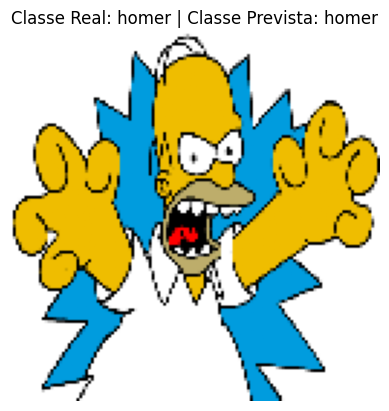


Probabilidade de ser 'homer' (classe 1): 52.38929%
Probabilidade de ser 'bart' (classe 0): 47.61071%

Tabela de Probabilidades Previstas:
Classe  Probabilidade (%)
 homer           52.38929
  bart           47.61071


In [61]:
testar_uma_imagem = True  # Ativa o teste individual

if testar_uma_imagem:
    # Gerar um lote da base de teste
    imagens, labels = next(base_teste)

    # Selecionar imagem aleatória dentro do lote
    indice = random.randint(0, imagens.shape[0] - 1)
    imagem = imagens[indice]
    label_real = int(labels[indice])

    # Preparar imagem para predição
    imagem_exp = np.expand_dims(imagem, axis=0)
    pred = classificador_bart_homer.predict(imagem_exp)

    # Corrigir a classe prevista com base na probabilidade (0 ou 1)
    classe_prevista = int(round(pred[0][0]))

    # Mapear índices para nomes de classes com base no dicionário do gerador
    classe_map = base_treinamento.class_indices  # Ex: {'cachorro': 0, 'gato': 1}
    indice_para_nome = {v: k for k, v in classe_map.items()}

    nome_classe_real = indice_para_nome[label_real]
    nome_classe_prevista = indice_para_nome[classe_prevista]

    # Exibir a imagem
    plt.imshow(imagem)
    plt.title(f"Classe Real: {nome_classe_real} | Classe Prevista: {nome_classe_prevista}")
    plt.axis('off')
    plt.show()

    # Calcular probabilidades em %
    prob_classe_0 = pred[0][0] * 100
    prob_classe_1 = 100 - prob_classe_0

    # Probabilidade de classe 1 (gato)
    prob_classe_1 = pred[0][0] * 100
    # Probabilidade de classe 0 (cachorro)
    prob_classe_0 = 100 - prob_classe_1

    # Exibir corretamente as probabilidades
    print(f"\nProbabilidade de ser '{indice_para_nome[1]}' (classe 1): {prob_classe_1:.5f}%")
    print(f"Probabilidade de ser '{indice_para_nome[0]}' (classe 0): {prob_classe_0:.5f}%")

    # Corrigir a tabela de probabilidades
    tabela_prob = pd.DataFrame({"Classe": [indice_para_nome[1], indice_para_nome[0]], "Probabilidade (%)": [prob_classe_1, prob_classe_0]})

    # Formatando a saída
    pd.options.display.float_format = '{:.5f}'.format
    print("\nTabela de Probabilidades Previstas:")
    print(tabela_prob.to_string(index=False))

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


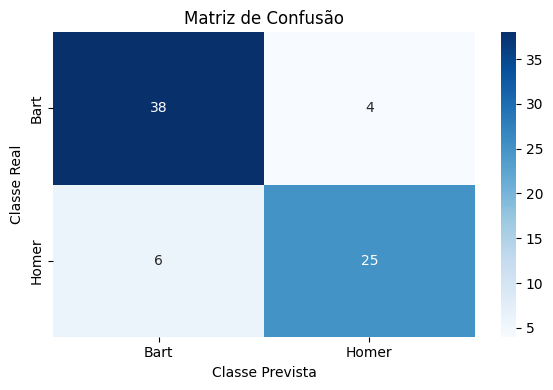

In [63]:
# Previsões do modelo para todos os dados da base de teste
y_probs = classificador_bart_homer.predict(base_teste)
y_pred = (y_probs > 0.5).astype("int").ravel()  # Converte para 0 ou 1
y_true = base_teste.classes  # Rótulos verdadeiros da base de teste

# Matriz de confusão
cm = confusion_matrix(y_true, y_pred)

# Mapeamento das classes
classe_map = base_treinamento.class_indices  # {'cachorro': 0, 'gato': 1}
indice_para_nome = {v: k.capitalize() for k, v in classe_map.items()}
rotulos = [indice_para_nome[0], indice_para_nome[1]]

# Plot da matriz
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=rotulos, yticklabels=rotulos)
plt.xlabel("Classe Prevista")
plt.ylabel("Classe Real")
plt.title("Matriz de Confusão")
plt.tight_layout()
plt.show()

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


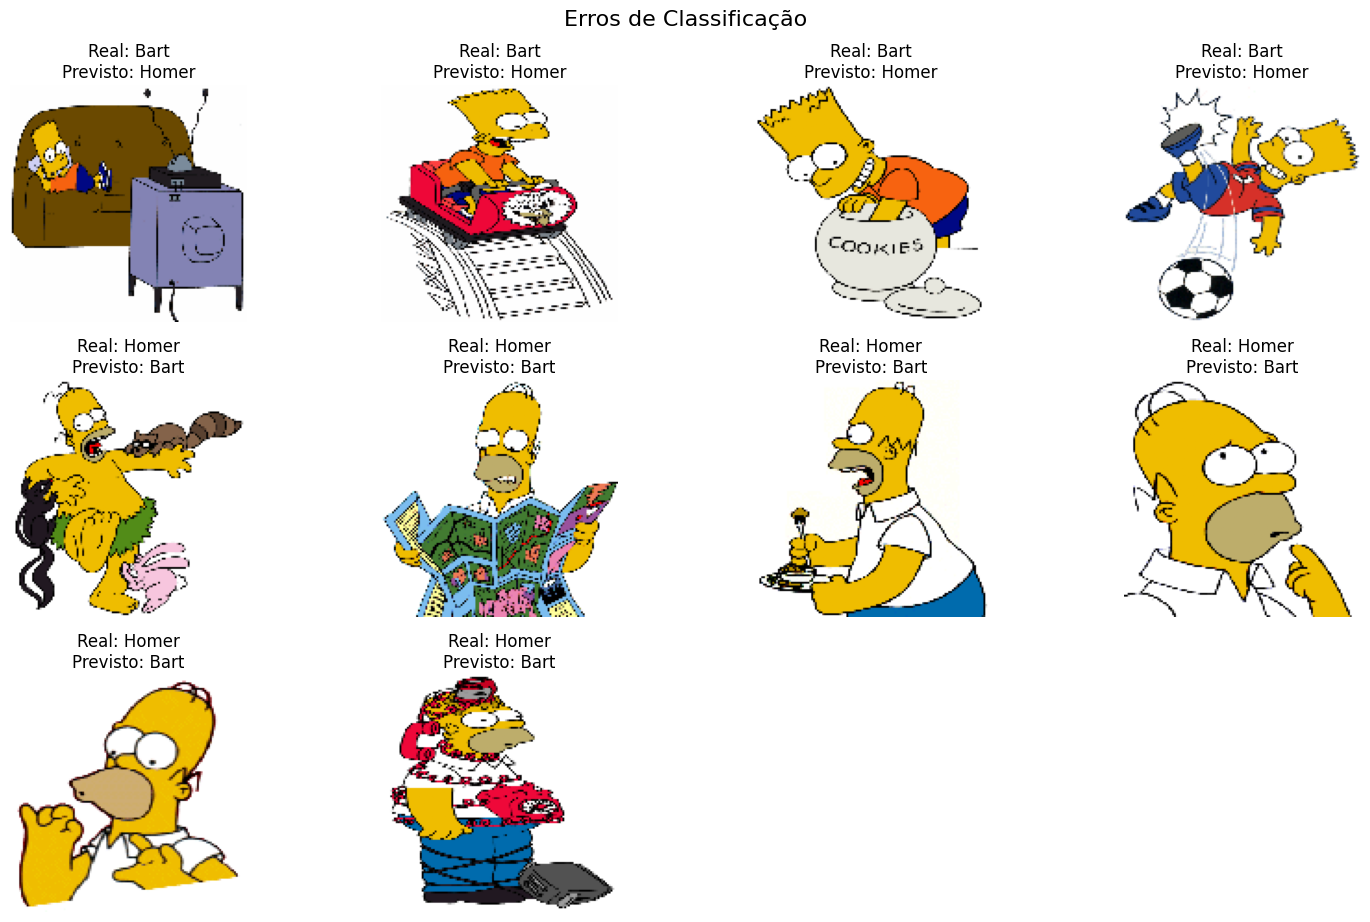

In [64]:
# Obter previsões completas
y_probs = classificador_bart_homer.predict(base_teste)
y_pred = (y_probs > 0.5).astype("int").ravel()
y_true = base_teste.classes

# Mapear classes
classe_map = base_treinamento.class_indices  # {'cachorro': 0, 'gato': 1}
indice_para_nome = {v: k.capitalize() for k, v in classe_map.items()}

# Obter imagens reais da base de teste
imagens_com_erro = []
rotulos_reais = []
rotulos_previstos = []

base_teste.reset()  # Reiniciar o gerador para garantir que imagens e classes estejam sincronizados
for i in range(len(base_teste)):
    img_batch, label_batch = base_teste[i]
    start = i * base_teste.batch_size
    end = start + img_batch.shape[0]
    for j in range(img_batch.shape[0]):
        idx = start + j
        if idx >= len(y_true):
            break
        if y_true[idx] != y_pred[idx]:
            imagens_com_erro.append(img_batch[j])
            rotulos_reais.append(y_true[idx])
            rotulos_previstos.append(y_pred[idx])

# Exibir imagens com erro em um grid (4 colunas)
num_erros = len(imagens_com_erro)
cols = 4
rows = int(np.ceil(num_erros / cols))

plt.figure(figsize=(15, rows * 3))
for i in range(num_erros):
    plt.subplot(rows, cols, i + 1)
    plt.imshow(imagens_com_erro[i])
    real = indice_para_nome[rotulos_reais[i]]
    pred = indice_para_nome[rotulos_previstos[i]]
    plt.title(f"Real: {real}\nPrevisto: {pred}")
    plt.axis('off')

plt.tight_layout()
plt.suptitle("Erros de Classificação", fontsize=16, y=1.02)
plt.savefig("C:/Users/CLIENTE/Downloads/erros_classificacao_grid_bart_homer.png", dpi=300, bbox_inches='tight')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


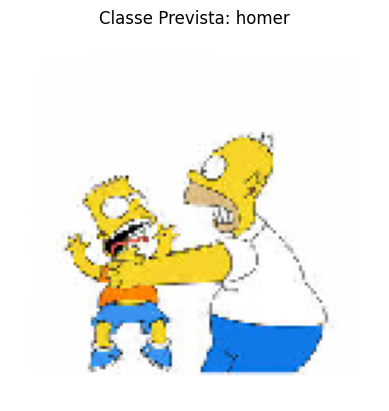


Probabilidade de ser 'homer' (classe 1): 52.38929%
Probabilidade de ser 'bart' (classe 0): 47.61071%

Tabela de Probabilidades Previstas:
Classe  Probabilidade (%)
 homer           52.38929
  bart           47.61071


In [65]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing import image

# Caminho da imagem a ser testada
caminho_imagem = r"C:\Users\CLIENTE\Downloads\bart_homer.jpg"

# Carregar e pré-processar a imagem
imagem_externa = image.load_img(caminho_imagem, target_size=(128, 128))  # Use o mesmo tamanho da rede
imagem_array = image.img_to_array(imagem_externa) / 255.0  # Normalização
imagem_exp = np.expand_dims(imagem_array, axis=0)  # Adiciona dimensão para batch

# Realizar a predição
pred = classificador_bart_homer.predict(imagem_exp)

# Interpretar a classe prevista (0 ou 1)
classe_prevista = int(round(pred[0][0]))

# Mapear índices para nomes de classes
classe_map = base_treinamento.class_indices  # Ex: {'cachorro': 0, 'gato': 1}
indice_para_nome = {v: k for k, v in classe_map.items()}
nome_classe_prevista = indice_para_nome[classe_prevista]

# Exibir a imagem
plt.imshow(imagem_array)
plt.title(f"Classe Prevista: {nome_classe_prevista}")
plt.axis('off')
plt.show()

# Calcular probabilidades
prob_classe_1 = pred[0][0] * 100
prob_classe_0 = 100 - prob_classe_1

# Mostrar as probabilidades
print(f"\nProbabilidade de ser '{indice_para_nome[1]}' (classe 1): {prob_classe_1:.5f}%")
print(f"Probabilidade de ser '{indice_para_nome[0]}' (classe 0): {prob_classe_0:.5f}%")

# Tabela de probabilidades
tabela_prob = pd.DataFrame({
    "Classe": [indice_para_nome[1], indice_para_nome[0]],
    "Probabilidade (%)": [prob_classe_1, prob_classe_0]
})

pd.options.display.float_format = '{:.5f}'.format
print("\nTabela de Probabilidades Previstas:")
print(tabela_prob.to_string(index=False))